# 1. Introduction to tight binding hamiltonian(TBH)


## Electronic Hamiltonian

$
\begin{align}
H = T_{\rm e} + T_{\rm n} + V_{\rm e-e} + V_{\rm n-e} + V_{\rm n-n}
\end{align}
$

Adiabatic aproximation,

$
\begin{align}
H_{\rm elec} = T_{\rm e} + V_{\rm n-e} + V_{\rm e-e} 
\end{align}
$

Typically, we define 

$
\begin{align}
V_{\rm ext} = \sum_{\rm I} \frac{e^2 Z_I}{|\vec{r}-\vec{R}_I|}
\end{align}
$

then, we can write the electronic Hamiltonian as

$
\begin{align}
H_{\rm elec} = \sum_{i} \bigg[ \frac{p_i^2}{2m} + V_{\rm ext}(\vec{r}_i) \bigg] + \frac{1}{2}\sum_{ij} \frac{e^2}{|\vec{r}_i-\vec{r}_j|}
\end{align}
$

Last equation is famously impossible to solve when the number of electros $N$ becomes large.

## Crystal Hamiltonian

$
\begin{align}
H = \frac{p^2}{2m} + V(\vec{r})
\end{align}
$

where $V(\vec{r}-\vec{R}_\ell) = V(\vec{r})$ for any lattice vector $\vec{R}_\ell=\ell_1\vec{a}_1+\ell_2\vec{a}_2+\ell_3\vec{a}_3$.

Each crystal lattice has associated a reciprocal lattice.

$
\begin{align}
H_{\vec{k}}=e^{-i\vec{k}\cdot\vec{r}} H e^{i\vec{k}\cdot\vec{r}}
\end{align}
$

$
\begin{align}
\vec{v}=\frac{1}{i\hbar}[\vec{r},H] \longrightarrow \vec{v}=\frac{1}{\hbar}\nabla_{\vec{k}}H_{\vec{k}}
\end{align}
$

## Tight-binding Hamiltonian

*Core:* Simplified representation that provies physical and chemical understanding.

Frequently, we choose some atomic-like orbitals $\varphi_j$ on site $j$. We can write the the trial Hamiltonian eigenstate as,

$
\begin{align}
\psi_n(\vec{r}) = \sum_j C_{nj}\varphi_j(\vec{r}-\vec{r}_j)
\end{align}
$

where the $C_{nj}$, the expansion coefficients of the $n$th eigenstate on the $j$th basis orbital, are to be determined. Therefore, the solutions are given by solving the matrix equation

$
\begin{align}
\big( H - E_n S) C_n = 0
\end{align}
$

where $H$ and $S$ are the $M\times M$ matrices

$
\begin{align}
H_{ij} &= \langle \varphi_i| H |\varphi_j\rangle \\
S_{ij} &= \langle \varphi_i| \varphi_j\rangle
\end{align}
$

$C_n$ is the $M$-component column vector of coefficients $C_{nj}$.

$H_{ii}$: **site energies**

$H_{ij}$: **hopping matrix elements** (off-diagonal)

$S_{ij}$: **overlap matrix** 

## Example: graphene-TBH

### Unit cell <--> Brillouin zone  

|<img src="images/1_UnitCell.png" title="UnitCell" width="400"/>||<img src="images/1_1BZ.png" title="UnitCell" width="300"/>|
|---------||-----------|
|Real space||Reciprocal space|

&nbsp;

<center>
$
{\normalsize
\begin{align}
\begin{bmatrix}
a_{1x}&a_{1y}\\
a_{2x}&a_{2y}
\end{bmatrix}
\begin{bmatrix}
b_{1x}&b_{2x}\\
b_{1y}&b_{2y}
\end{bmatrix}=
\begin{bmatrix}
2\pi&0\\
0&2\pi
\end{bmatrix}
\end{align}
}
$
</center>

## Example: graphene-TBH

<center>
$
{\large
\begin{align}
\mathcal{H} = 
\begin{bmatrix}
0&-t\big(1+e^{-i\vec{k}\cdot\vec{a}_1}+e^{-i\vec{k}\cdot\vec{a}_2}\big)\\
-t\big(1+e^{i\vec{k}\cdot\vec{a}_1}+e^{i\vec{k}\cdot\vec{a}_2}\big)&0\\
\end{bmatrix}
\end{align}
}
$
</center>

|<img src="images/1_DispersionRel.jpg" title="UnitCell" width="400"/>||<img src="images/1_GrapheneBands.png" title="UnitCell" width="300"/>|
|---------||-----------|
|Dispersion relation||Electronic bands|

## Hands-on

In [1]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
## Malla Monkhorst-Pack
π    = pi; nk = 100
a1   = array([sqrt(3),     0])
a2   = array([sqrt(3)/2, 3/2])
M    = array( [[a1[0],a1[1]],[a2[0],a2[1]]] )
Minv = 2*π*linalg.inv(M)
b1   = array( [ Minv[(0,0)],Minv[(1,0)] ] )
b2   = array( [ Minv[(0,1)],Minv[(1,1)] ] )
X,Y  = meshgrid(linspace(0,1,nk),linspace(0,1,nk))
KX   = X*b1[0]+Y*b2[0] 
KY   = X*b1[1]+Y*b2[1]
α    = 1.0+exp(-1.J*(KX*a1[0]+KY*a1[1]) )+exp(-1.J*(KX*a2[0]+KY*a2[1]) )
αc   = 1.0+exp( 1.J*(KX*a1[0]+KY*a1[1]) )+exp( 1.J*(KX*a2[0]+KY*a2[1]) )
E    = α*αc

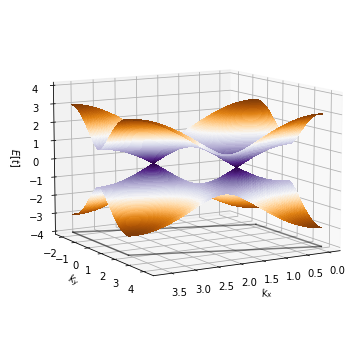

In [2]:
fig = plt.figure(figsize=(6,6));
ax  = fig.gca(projection='3d');
ax.plot([0,b1[0]], [0,b1[1]], zs=-4, zdir='z',c='k',alpha=0.5,zorder=0);
ax.plot([0,b2[0]], [0,b2[1]], zs=-4, zdir='z',c='k',alpha=0.5,zorder=0);
ax.plot([b1[0],b1[0]+b2[0]], [b1[1],b1[1]+b2[1]], zs=-4, zdir='z',c='k',alpha=0.5,zorder=0);
ax.plot([b2[0],b1[0]+b2[0]], [b2[1],b1[1]+b2[1]], zs=-4, zdir='z',c='k',alpha=0.5,zorder=0);

surf = ax.plot_surface(KX, KY, np.sqrt( E.real), rstride=1, cstride=1,
          cmap=plt.get_cmap('PuOr_r'),linewidth=0, antialiased=False,zorder=1);
surf = ax.plot_surface(KX, KY, -np.sqrt( E.real), rstride=1, cstride=1,
          cmap=plt.get_cmap('PuOr'),  linewidth=0, antialiased=False,zorder=1);
ax.set_zlim(-4,4);
ax.view_init(10, 60)
ax.set_xlabel('$k_x$');
ax.set_ylabel('$k_y$');
ax.set_zlabel('$E [t]$');

## Python Tight Binding (PythTB)

<center>
    <img src="images/1_UnitCell_pythtb.png" title="UnitCell" width="400"/>
</center>

&nbsp;
&nbsp;

<center>
lattice vectors in a-units: $\vec{a_1}=\bigg[1,0\bigg]\,$ and $\vec{a_2}=\bigg[\frac{1}{2},\frac{\sqrt{3}}{2}\bigg]$
</center>


&nbsp;
<center>

orbital positions: $C_0=\frac{1}{3}\vec{a}_1+\frac{1}{3}\vec{a}_2$ and $C_1=\frac{2}{3}\vec{a}_1+\frac{2}{3}\vec{a}_2$
</center>


/home/jebarrios/TQMex Dropbox/Jose Eduardo Barrios Vargas/FQ-UNAM/1_Cursos-FQUNAM/PropiedadesFísicasdelosSólidos-2021-2/NoteBook/CMTEM_2019/pythtb.py:113: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if lat is 'unit' or lat is None:
/home/jebarrios/TQMex Dropbox/Jose Eduardo Barrios Vargas/FQ-UNAM/1_Cursos-FQUNAM/PropiedadesFísicasdelosSólidos-2021-2/NoteBook/CMTEM_2019/pythtb.py:133: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if orb is 'bravais' or orb is None:


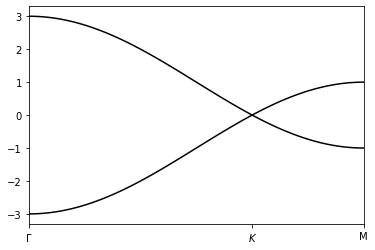

In [3]:
from pylab import *
from pythtb import *
lattice = [ [1.0, 0.0],    [1./2., sqrt(3.0)/2.0] ]  # Lattice vectors and 
orbital = [ [1/3., 1./3.], [2./3., 2./3.] ]          # Orbital positions
graphene = tb_model(2, 2, lattice, orbital)          # Two-dimensional TBH
graphene.set_hop(-1.0, 0, 1, [ 0, 0])
graphene.set_hop(-1.0, 1, 0, [ 1, 0])   # Define hopping between orbitals
graphene.set_hop(-1.0, 1, 0, [ 0, 1])
kpoints = [ [0.0, 0.0], [1./3., 2./3.], [0.5, 0.5] ] # Path in k-space
klabels = [ "$\Gamma$",     "$K$",         "M"     ]
(k_vec,k_dist,k_node) = graphene.k_path(kpoints, 100,report=False)
evals   = graphene.solve_all(k_vec) # Solve model on k-path
fig, ax = plt.subplots()            # Plot bandstructure
ax.plot(k_dist, evals[0,:], c='k') 
ax.plot(k_dist, evals[1,:], c='k')
ax.set_xticks(k_node)
ax.set_xticklabels(klabels)
ax.set_xlim(k_node[0],k_node[-1]);

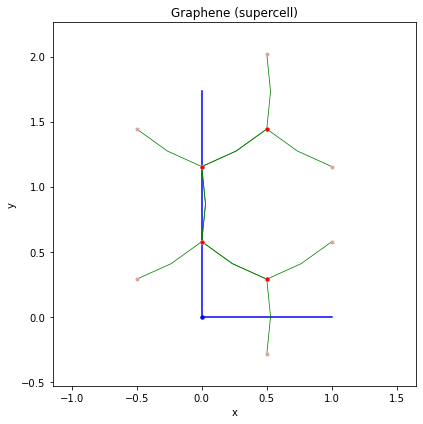

In [4]:
# Graphene supercell (4 atoms)

graphene_sc = graphene.make_supercell([[1, 0], [-1, 2]])

(fig,ax) = graphene_sc.visualize(0,1)
ax.set_title("Graphene (supercell)")
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.tight_layout()

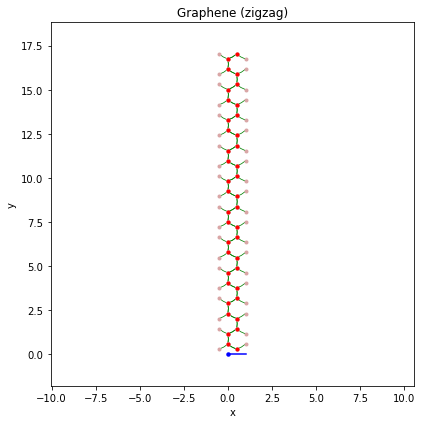

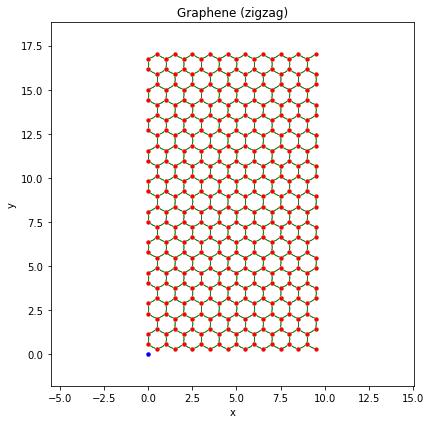

In [5]:
# Ribbons zig-zag
graphene_sc = graphene.make_supercell([[1, 0], [-1, 2]])
zigzag = graphene_sc.cut_piece(10,1,glue_edgs=False)

(fig,ax) = zigzag.visualize(0,1)
ax.set_title("Graphene (zigzag)")
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.tight_layout()

zigzagR = zigzag.cut_piece(10,0,glue_edgs=False)
(fig,ax) = zigzagR.visualize(0,1)
ax.set_title("Graphene (zigzag)")
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.tight_layout()

In [6]:
# Camino en el espacio recíproco y evaluación

path  = [ [-0.5],       [0.], [0.5] ]
label = (r'$-X$',r'$\Gamma $',   r'$X$')
nk    = 100
(k_vec,k_dist,k_node) = zigzag.k_path(path,nk,report=False)

evals = zigzag.solve_all(k_vec)

natoms = zigzag.get_num_orbitals()

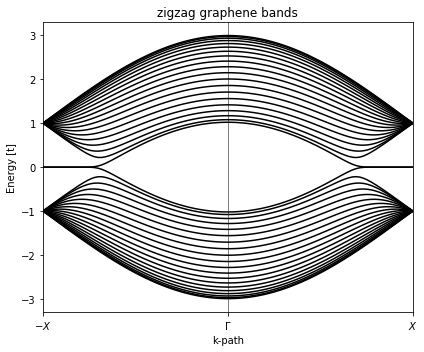

In [7]:
fig, ax = plt.subplots(figsize=(6,5))

for n in range(natoms):
    ax.plot(k_dist,evals[n],'-',c='black')

ax.set_xlim(k_node[0],k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(label)
ax.axvline(x=k_node[1],linewidth=0.5, color='k')
ax.set_title("zigzag graphene bands")
ax.set_xlabel("k-path")
ax.set_ylabel("Energy [t]")

fig.tight_layout()

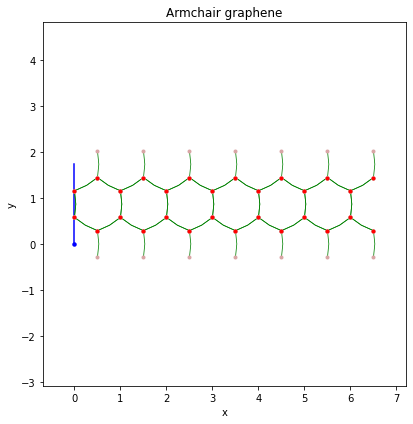

In [14]:
# Ribbons armchair

armchair = graphene_sc.cut_piece(7,0,glue_edgs=False)

(fig,ax) = armchair.visualize(0,1)
ax.set_title("Armchair graphene")
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.tight_layout()

In [15]:
path  = [ [-0.5],  [0.], [0.5] ]
label = (r'$-X$', r'$\Gamma $',   r'$X$')
nk    = 100
(k_vec,k_dist,k_node) = armchair.k_path(path,nk,report=False)

evals  = armchair.solve_all(k_vec)

natoms = armchair.get_num_orbitals()

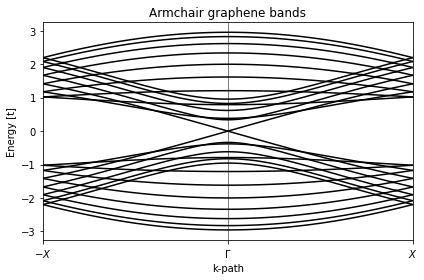

In [16]:
fig, ax = plt.subplots()

for n in range(natoms):
    ax.plot(k_dist,evals[n],'-',c='black')

ax.set_xlim(k_node[0],k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(label)
ax.axvline(x=k_node[1],linewidth=0.5, color='k')
ax.set_title("Armchair graphene bands")
ax.set_xlabel("k-path")
ax.set_ylabel("Energy [t]")

fig.tight_layout()


|Topological band engineering of graphene nanoribbons|Engineering of robust topological quantum phases in graphene nanoribbons|
|---------|-----------|
|Nature 560, 204-208 (2018)|Nature 560, 209-213 (2018)|
|<img src="images/1_RefExpA.png" title="UnitCell" width="120"/>|<img src="images/1_RefExpB2.png" title="UnitCell" width="160"/>|